# Compare Atomic Files

This notebook shows how to compare the `levels_prepared` and `lines_prepared` DataFrames of the atomic files generated by Carsus.

In [1]:
import os
import pandas as pd
import numpy as np
import logging
from carsus.util import parse_selected_species, convert_symbol2atomic_number, convert_atomic_number2symbol
from collections import defaultdict
from carsus.io.nist import NISTWeightsComp, NISTIonizationEnergies
from carsus.io.kurucz import GFALLReader
from carsus.io.zeta import KnoxLongZeta
from carsus.io.chianti_ import ChiantiReader
from carsus.io.output import TARDISAtomData
from collections import defaultdict
import matplotlib.pyplot as plt
from carsus.io import AtomDataCompare

 ChiantiPy version 0.8.4 
 found PyQt5 widgets
 using PyQt5 widgets


In [2]:
logger = logging.getLogger(__name__)

In [3]:
%matplotlib inline

In [4]:
ATOM1_PATH = os.environ.get("ATOM1_PATH", None)
ATOM2_PATH = os.environ.get("ATOM2_PATH", None)

In [5]:
path = "/home/atharva/workspace/code/tardis-main/carsus/kurucz_cd23_chianti_He_cmfgen_H_Si_I-II.h5"
path2 = "/home/atharva/workspace/code/tardis-main/refdata/atom_data/kurucz_cd23_chianti_H_He.h5"
atc = AtomDataCompare(path, path2)
atc.setup()
atc.set_keys_as_attributes()
atc.generate_comparison_table()
# atc.teardown()

In [7]:
atc.comparison_table_stylized

,exists_1,exists_2,match
atom_data,True,True,False
collision_data_temperatures,False,True,False
collisions,True,True,False
collisions_metadata,True,False,False
ionization_data,True,True,False
levels,True,True,False
lines,True,True,False
macro_atom_data,True,True,False
macro_atom_references,True,True,False
metadata,True,False,False


In [8]:
atc.style_df(key_name="lines", ion="He")

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:173: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:174: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


In [9]:
atc.merged_lines_He

line_id_1  line_id_2  matches_line_id  \
level_number_lower level_number_upper                                          
0                  6                      533201     533166            False   
                   16                     533202     533167            False   
                   30                     533203     533168            False   
                   48                     533204     533169            False   
1                  3                      533205     533170            False   
...                                          ...        ...              ...   
28                 46                     533372     533344            False   
29                 39                     533373     533345            False   
                   47                     533374     533346            False   
30                 32                     533375     533347            False   
                   39                     533376     533348            False   

                                       wavelength_1  wavelength_2  \
level_number_lower level_number_upper                               
0                  6                        584.334       584.335   
                   16                       537.030       537.031   
                   30                       522.213       522.214   
                   48                       515.617       515.618   
1                  3                      10833.307     10833.307   
...                                             ...           ...   
28                 46                     40490.240     40490.314   
29                 39                     40545.055     40545.130   
                   47                     40490.354     40490.429   
30                 32                     46066.009     46066.094   
                   39                     41227.304     41227.380   

                                       matches_wavelength  \
level_number_lower level_number_upper                       
0                  6                                False   
                   16                               False   
                   30                               False   
                   48                               False   
1                  3                                 True   
...                                                   ...   
28                 46                               False   
29                 39                               False   
                   47                               False   
30                 32                               False   
                   39                               False   

                                       pct_change_wavelength    f_ul_1  \
level_number_lower level_number_upper                                    
0                  6                                0.000002  0.092000   
                   16                               0.000002  0.024467   
                   30                               0.000002  0.010067   
                   48                               0.000002  0.005100   
1                  3                                0.000000  0.365400   
...                                                      ...       ...   
28                 46                               0.000002  0.228857   
29                 39                               0.000002  0.012820   
                   47                               0.000002  1.046889   
30                 32                               0.000002  0.477000   
                   39                               0.000002  0.390000   

                                         f_ul_2  matches_f_ul  ...  \
level_number_lower level_number_upper                          ...   
0                  6                   0.092000          True  ...   
                   16                  0.024467          True  ...   
                   30                  0.010067          True  

In [10]:
atc.diff(key_name="collisions", ion='He')

Elements not in common in both dataframes: {'H'}


g_ratio_1  g_ratio_2  matches_g_ratio  \
level_number_lower level_number_upper                                          
0                  1                    0.333333   0.333333             True   
                   2                    1.000000   1.000000             True   
                   3                    0.200000   0.200000             True   
                   4                    0.333333   0.333333             True   
                   5                    1.000000   1.000000             True   
...                                          ...        ...              ...   
5                  44                   0.111111   0.111111             True   
                   45                   0.090909   0.090909             True   
                   46                   0.142857   0.142857             True   
                   47                   0.111111   0.111111             True   
                   48                   0.333333   0.333333             True   

                                       pct_change_g_ratio      delta_e_1  \
level_number_lower level_number_upper                                      
0                  1                                  0.0  229997.304898   
                   2                                  0.0  239236.361880   
                   3                                  0.0  243278.359386   
                   4                                  0.0  243278.468733   
                   5                                  0.0  243279.890245   
...                                                   ...            ...   
5                  44                                 0.0   35730.286029   
                   45                                 0.0   35730.290345   
                   46                                 0.0   35730.294662   
                   47                                 0.0   35730.296100   
                   48                                 0.0   35760.281659   

                                           delta_e_2  matches_delta_e  \
level_number_lower level_number_upper                                   
0                  1                   229997.241940            False   
                   2                   239236.296392            False   
                   3                   243278.292792            False   
                   4                   243278.402139            False   
                   5                   243279.823650            False   
...                                              ...              ...   
5                  44                   35730.276248            False   
                   45                   35730.280565            False   
                   46                   35730.284881            False   
                   47                   35730.286320            False   
                   48                   35760.271870            False   

                                       pct_change_delta_e     t002000_1  \
level_number_lower level_number_upper                                     
0                  1                        -2.737351e-07  1.596743e-09   
                   2                        -2.737351e-07  1.915945e-09   
                   3                        -2.737351e-07  5.740703e-11   
                   4                        -2.737351e-07  6.916443e-11   
                   5                        -2.737351e-07  6.682296e-11   
...                                                   ...           ...   
5                  44                       -2.737351e-07  5.012987e-10   
                   45                       -2.737351e-07  5.012013e-10   
                   46                       -2.737351e-07  5.011762e-10   
                   47                       -2.737351e-07  1.930993e-10   
                   48                       -2.737351e-07  7.744718e-10   

                                          t002000_2  ...  matches_t044000  \
level_

In [11]:
atc.diff(key_name="lines", ion='H', simplify_output=False)

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:173: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:174: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


line_id_1  line_id_2  matches_line_id  \
level_number_lower level_number_upper                                          
0                  1                      533444     533089            False   
                   3                      533446     533090            False   
                   4                      533447     533091            False   
                   6                      533449     533092            False   
                   9                      533452     533093            False   
...                                          ...        ...              ...   
14                 20                     533764     533158            False   
                   23                     533767     533159            False   
15                 20                     533778     533160            False   
                   23                     533781     533161            False   
                   24                     533782     533162            False   

                                       wavelength_1  wavelength_2  \
level_number_lower level_number_upper                               
0                  1                        1215.67      1215.676   
                   3                         972.54      1215.670   
                   4                         949.74      1025.725   
                   6                         930.75      1025.724   
                   9                         920.96       972.539   
...                                             ...           ...   
14                 20                     418700.00     40522.816   
                   23                     336600.00     40522.816   
15                 20                     556300.00     40522.945   
                   23                     420000.00     40522.945   
                   24                     395200.00     40522.816   

                                       matches_wavelength  \
level_number_lower level_number_upper                       
0                  1                                False   
                   3                                False   
                   4                                False   
                   6                                False   
                   9                                False   
...                                                   ...   
14                 20                               False   
                   23                               False   
15                 20                               False   
                   23                               False   
                   24                               False   

                                       pct_change_wavelength    f_ul_1  \
level_number_lower level_number_upper                                    
0                  1                                0.000005  0.104050   
                   3                                0.249995  0.001812   
                   4                                0.080006  0.000558   
                   6                                0.102040  0.000098   
                   9                                0.056006  0.000016   
...                                                      ...       ...   
14                 20                              -0.903218  0.012806   
                   23                              -0.879611  0.003464   
15                 20                              -0.927156  0.024718   
                   23                              -0.903517  0.005529   
                   24                              -0.897463  0.003771   

                                         f_ul_2  matches_f_ul  ...  \
level_number_lower level_number_upper                          ...   
0                  1                   0.139000         False  ...   
                   3                   0.138750         False  ...   
                   4                   0.026350         False  

In [103]:
atc.diff(key_name="levels", ion='H')

,matches_energy,pct_change_energy,matches_g,pct_change_g,matches_metastable
level_number,,,,,
0,True,0.000000,True,0.000000,True
1,False,-0.000002,False,-0.750000,True
2,False,-0.156252,False,-0.888889,False
3,False,-0.199998,False,-0.875000,True
4,False,-0.074075,False,-0.960000,True
5,False,-0.085715,False,-0.972222,True
6,False,-0.092592,False,-0.959184,True
7,False,-0.097001,False,-0.968750,True
8,False,-0.099999,False,-0.962963,True


In [106]:
atc.merged_lines_H

line_id_1  line_id_2  matches_line_id  \
level_number_lower level_number_upper                                          
0                  1                      533444     533089            False   
                   3                      533446     533090            False   
                   4                      533447     533091            False   
                   6                      533449     533092            False   
                   9                      533452     533093            False   
...                                          ...        ...              ...   
14                 20                     533764     533158            False   
                   23                     533767     533159            False   
15                 20                     533778     533160            False   
                   23                     533781     533161            False   
                   24                     533782     533162            False   

                                       wavelength_1  wavelength_2  \
level_number_lower level_number_upper                               
0                  1                        1215.67      1215.676   
                   3                         972.54      1215.670   
                   4                         949.74      1025.725   
                   6                         930.75      1025.724   
                   9                         920.96       972.539   
...                                             ...           ...   
14                 20                     418700.00     40522.816   
                   23                     336600.00     40522.816   
15                 20                     556300.00     40522.945   
                   23                     420000.00     40522.945   
                   24                     395200.00     40522.816   

                                       matches_wavelength  \
level_number_lower level_number_upper                       
0                  1                                False   
                   3                                False   
                   4                                False   
                   6                                False   
                   9                                False   
...                                                   ...   
14                 20                               False   
                   23                               False   
15                 20                               False   
                   23                               False   
                   24                               False   

                                       pct_change_wavelength    f_ul_1  \
level_number_lower level_number_upper                                    
0                  1                                0.000005  0.104050   
                   3                                0.249995  0.001812   
                   4                                0.080006  0.000558   
                   6                                0.102040  0.000098   
                   9                                0.056006  0.000016   
...                                                      ...       ...   
14                 20                              -0.903218  0.012806   
                   23                              -0.879611  0.003464   
15                 20                              -0.927156  0.024718   
                   23                              -0.903517  0.005529   
                   24                              -0.897463  0.003771   

                                         f_ul_2  matches_f_ul  ...  \
level_number_lower level_number_upper                          ...   
0                  1                   0.139000         False  ...   
                   3                   0.138750         False  ...   
                   4                   0.026350         False  

[                py.warnings][WARNING] - /home/atharva/miniconda3/envs/carsus-devel/lib/python3.7/site-packages/ipykernel_launcher.py:111: PerformanceWarning: indexing past lexsort depth may impact performance.
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/miniconda3/envs/carsus-devel/lib/python3.7/site-packages/ipykernel_launcher.py:112: PerformanceWarning: indexing past lexsort depth may impact performance.
 (warnings.py:110)


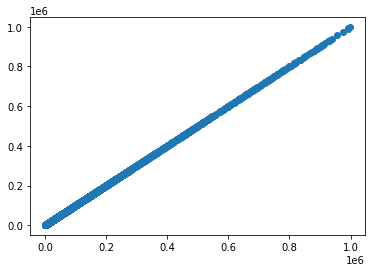

In [111]:
atc.plot(key_name="lines", ion="Fe", column="wavelength")

In [ ]:
def compare_levels_lines(path_a, path_b, ions='H-Zn'):
    
    # Read data
    levels_a = pd.read_hdf(path_a, key='levels_data')
    levels_b = pd.read_hdf(path_b, key='levels_data')
    lines_a = pd.read_hdf(path_a, key='lines_data')
    lines_b = pd.read_hdf(path_b, key='lines_data')
    
    # Get ions list
    ions = parse_selected_species(ions)
    
    lvl_eq = []
    lns_eq = []
    for ion in ions:
        
        # How many levels per ion in A
        try:
            num_lvl_a = len(levels_a.loc[ion])
            
        except (KeyError, TypeError, ValueError):
            num_lvl_a = 0
            
        # How many levels per ion in B
        try:
            num_lvl_b = len(levels_b.loc[ion])
            
        except (KeyError, TypeError, ValueError):
            num_lvl_b = 0

        # If level number is the same in A and B (and not zero) 
        # then compare cell against cell. `True` means all cells 
        # are equal in both dataframes.
        if num_lvl_a == num_lvl_b:
            val_lvl = True
            
            if num_lvl_a != 0:
                try:
                    k = levels_a.loc[ion].eq(levels_b.loc[ion]).sum().sum()
                    if num_lvl_a*3 != k:  # x3 because this df has three columns!
                        val_lvl = False
                        
                except (KeyError, TypeError, ValueError):
                    pass

        else:
            val_lvl = False
            
        # Append the results
        lvl_eq.append((ion, num_lvl_a, num_lvl_b, val_lvl))
        
        
        # Same for lines
        try:
            num_lns_a = len(lines_a.loc[ion])
            
        except (KeyError, TypeError, ValueError):
            num_lns_a = 0
            
        try:
            num_lns_b = len(lines_b.loc[ion])
            
        except (KeyError, TypeError, ValueError):
            num_lns_b = 0

        if num_lns_a == num_lns_b:
            val_lns = True
            
            if num_lns_a != 0:
                try:
                    k = lines_a.loc[ion].eq(lines_b.loc[ion]).sum().sum()
                    if num_lns_a*8 != k:
                        val_lvl = False
            
                except (KeyError, TypeError, ValueError):
                    pass
            
        else:
            val_lns = False
        
        lns_eq.append((ion, num_lns_a, num_lns_b, val_lns))
            
    df_lvl = pd.DataFrame(lvl_eq, columns=['ion', 'num_lvl_a', 'num_lvl_b', 'val_lvl'])
    df_lns = pd.DataFrame(lns_eq, columns=['ion', 'num_lns_a', 'num_lns_b', 'val_lns'])
    df = pd.merge(df_lvl, df_lns).set_index('ion')
    
    df['diff_lvl'] = abs(df['num_lvl_b'] - df['num_lvl_a'])
    df['diff_lns'] = abs(df['num_lns_b'] - df['num_lns_a'])
    df = df[['num_lvl_a', 'num_lvl_b', 'diff_lvl', 'val_lvl', 
          'num_lns_a', 'num_lns_b', 'diff_lns', 'val_lns']]

    return df

### Custom Atomic Data

To generate and compare atomic data files locally, please uncomment the code below.<br>
For the first atomic file we grab species `H-C` from GFALL and `H-He` from Chianti.

In [ ]:
# atomic_weights = NISTWeightsComp()
# ionization_energies = NISTIonizationEnergies('H-C')
# gfall_reader = GFALLReader(ions='H-C')
# chianti_reader = ChiantiReader(ions='H-He', collisions=True, priority=20)
# zeta_data = KnoxLongZeta()

In [ ]:
# atom_data_a = TARDISAtomData(atomic_weights,
#                              ionization_energies,
#                              gfall_reader,
#                              zeta_data,
#                              chianti_reader)

In [ ]:
# atom_data_a.to_hdf('A.h5')

For the second atomic file we grab species `H-C` from GFALL and `C` from Chianti.

In [ ]:
# chianti_reader = ChiantiReader(ions='C', collisions=True, priority=20)

In [ ]:
# atom_data_b = TARDISAtomData(atomic_weights,
#                              ionization_energies,
#                              gfall_reader,
#                              zeta_data,
#                              chianti_reader)

In [ ]:
# atom_data_b.to_hdf('B.h5')

In [ ]:
# tt = compare_levels_lines('A.h5', 'B.h5', ions='H-C')

```
num_xxx_y (int) : number of levels/lines.
diff_xxx (int) : difference in number of levels/lines.
val_xxx (bool) : `True` if levels/lines have the same value.
```

In [ ]:
tt.style.applymap(highlight_values, subset=['val_lvl', 'val_lns']).applymap(
                    highlight_diff, subset=['diff_lvl', 'diff_lns'])